In [1]:
import csv
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack    
import scipy.signal as signal
import neurokit2 as nk
from scipy.io import loadmat
import os
import sys
import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
labels = ['10370003','111975006', '164889003', '164890007' ,'164909002' ,'164917005',
 '164934002' ,'164947007', '17338001', '251146004' ,'270492004' ,'284470004',
 '39732003' ,'426177001', '426627000', '426783006' ,'427084000', '427172004',
 '427393009' ,'445118002', '47665007' ,'59118001', '59931005' ,'63593006',
 '698252002', '713426002' ,'713427006']

In [3]:
 y_code = ['10370003', '111975006', '164889003', '164890007', '164909002', '164917005',
              '164934002', '164947007', '17338001', '251146004', '270492004', '284470004',
              '39732003', '426177001', '426627000', '426783006', '427084000', '427172004',
              '427393009', '445118002', '47665007', '59118001', '59931005', '63593006',
              '698252002', '713426002', '713427006']
y_full_length_name = ['pacing rhythm',
                          'prolonged qt interval', 'atrial fibrillation', 'atrial flutter', 'left bundle branch block',
                          'qwave abnormal', 't wave abnormal', 'prolonged pr interval', 'ventricular premature beats', 'low qrs voltages',
                          '1st degree av block', 'supraventricular premature beats', 'left axis deviation',
                          'sinus bradycardia', 'bradycardia', 'sinus rhythm', 'sinus tachycardia',
                          'ventricular premature beats', 'sinus arrhythmia', 'left anterior fascicular block', 'right axis deviation',
                          'right bundle branch block', 't wave inversion', 'supraventricular premature beats', 'nonspecific intraventricular conduction disorder', 'incomplete right bundle branch block', 'complete right bundle branch block']
y_abbrv_name = ['PR', 'LQT', 'AF', 'AFL',
                    'LBBB', 'QAb', 'TAb', 'LPR', 'VPB', 'LQESV', 'IAVB', 'SVPB', 'LAD', 'SB', 'Brady', 'SNR', 'STach',
                    'VPB', 'SA', 'LAnFB', 'RAD', 'RBBB', 'TInv', 'SVPB', 'NSIVCB', 'IRBBB', 'CRBBB']

In [4]:
labels_18 = ['17338001','47665007','59118001','59931005','63593006','111975006','164889003','164890007','164909002','164917005','164934002','270492004','284470004','426177001','427172004','445118002','698252002','713426002']

In [6]:
labels_name = []
labels_abrv = []
for i in labels_18:
    indx = y_code.index(i)
    labels_name.append(y_full_length_name[indx])
    labels_abrv.append(y_abbrv_name[indx])

In [7]:
labels_name

['ventricular premature beats',
 'right axis deviation',
 'right bundle branch block',
 't wave inversion',
 'supraventricular premature beats',
 'prolonged qt interval',
 'atrial fibrillation',
 'atrial flutter',
 'left bundle branch block',
 'qwave abnormal',
 't wave abnormal',
 '1st degree av block',
 'supraventricular premature beats',
 'sinus bradycardia',
 'ventricular premature beats',
 'left anterior fascicular block',
 'nonspecific intraventricular conduction disorder',
 'incomplete right bundle branch block']

In [8]:
labels_abrv

['VPB',
 'RAD',
 'RBBB',
 'TInv',
 'SVPB',
 'LQT',
 'AF',
 'AFL',
 'LBBB',
 'QAb',
 'TAb',
 'IAVB',
 'SVPB',
 'SB',
 'VPB',
 'LAnFB',
 'NSIVCB',
 'IRBBB']

In [9]:
len(labels_abrv)

18

In [10]:

def load_ECG_data(path):
    file_counter = 0
    signal_data, age_gender_data, label_data = [],[],[]
    for dir1 in os.listdir(path):
        path1 = os.path.join(path, dir1)
        if os.path.isdir(path1):
            for dir2 in os.listdir(path1):
                path2 = os.path.join(path1, dir2)
                if os.path.isdir(path2):
                    for file in os.listdir(path2):
                        file_name = file.split(".")[0]
                        heaFile = os.path.join(path2, file_name+".hea")
                        header_reader = open(heaFile, 'r')
                        header = header_reader.read()
                        header = header.split("\n")
                        try:
                            age = int(header[13].split(":")[1].replace(" ", ""))
                        except:
                            
                            age = -1
                        sex = (header[14].split(":")[1]).replace(" ", "")
                        if sex=="Female" or sex=="F" or sex == "female":
                            sex = 1
                        elif sex == "NaN":
                            sex = 2
                        else:
                            sex = 0
                        age_gender = [age, sex]
                        age_gender = np.array(age_gender)
                        label = ((header[15].split(":")[1]).split(",")[0]).replace(" ", "")
                        found= "T"
                        try:
                            label = labels_18.index(str(label))
                            matFile = os.path.join(path2, file_name+".mat")
                            signal = loadmat(matFile)
                            signal = signal['val']
                            signal = pad_sequences(signal, maxlen=2500, truncating='post',padding="post")
                            signal = np.array(signal)
                            signal = signal/np.max(signal)
                            signal = signal.reshape(2500,12)
                            signal_data.append(signal)
                            age_gender_data.append(age_gender)
                            
                            label_data.append(label)
                            
                        except:
                            found="F"
                            continue
                        file_counter+=1
                        sys.stdout.write('\r')
                        sys.stdout.write("Progress: "+found+" "+str(file_counter)+"")
                        sys.stdout.flush()
    return signal_data, age_gender_data, label_data

In [11]:
signal_data, age_gender_data, label_data = load_ECG_data(".../input")

Progress: T 21496

In [ ]:
#model construction

In [ ]:
# def build_model():
#     inputA = keras.layers.Input(shape=(2500,12))
#     inputB = keras.layers.Input(shape=(2,))


#     conv1 = keras.layers.Conv1D(filters=128, kernel_size=8,input_shape=(2500,12), padding='same')(inputA)
#     conv1 = keras.layers.BatchNormalization()(conv1)
#     conv1 = keras.layers.Activation(activation='relu')(conv1)

#     conv2 = keras.layers.Conv1D(filters=256, kernel_size=5, padding='same')(conv1)
#     conv2 = keras.layers.BatchNormalization()(conv2)
#     conv2 = keras.layers.Activation('relu')(conv2)

#     conv3 = keras.layers.Conv1D(128, kernel_size=3,padding='same')(conv2)
#     conv3 = keras.layers.BatchNormalization()(conv3)
#     conv3 = keras.layers.Activation('relu')(conv3)

#     gap_layer = keras.layers.GlobalAveragePooling1D()(conv3)
#     model1 = keras.Model(inputs=inputA, outputs=gap_layer)

    
#     mod3 = keras.layers.Dense(50, activation="relu")(inputB) # 2 -> 100
#     mod3 = keras.layers.Dense(2, activation="sigmoid")(mod3) # Added this layer
#     model3 = keras.Model(inputs=inputB, outputs=mod3)

#     combined = keras.layers.concatenate([model1.output, model3.output])
#     final_layer = keras.layers.Dense(18, activation="sigmoid")(combined)
#     model = keras.models.Model(inputs=[inputA,inputB], outputs=final_layer)

#     model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
#     return model

In [12]:
def fcn_encoder():
    inputA = keras.layers.Input(shape=(2500,12))
    inputB = keras.layers.Input(shape=(2,))


#     conv1 = keras.layers.Conv1D(filters=128, kernel_size=8,input_shape=(5000,12), padding='same')(inputA)
#     conv1 = keras.layers.BatchNormalization()(conv1)
#     conv1 = keras.layers.Activation(activation='relu')(conv1)

#     conv2 = keras.layers.Conv1D(filters=256, kernel_size=5, padding='same')(conv1)
#     conv2 = keras.layers.BatchNormalization()(conv2)
#     conv2 = keras.layers.Activation('relu')(conv2)

#     conv3 = keras.layers.Conv1D(128, kernel_size=3,padding='same')(conv2)
#     conv3 = keras.layers.BatchNormalization()(conv3)
#     conv3 = keras.layers.Activation('relu')(conv3)

#     gap_layer = keras.layers.GlobalAveragePooling1D()(conv3)
#     model1 = keras.Model(inputs=inputA, outputs=gap_layer)
    model1 = keras.layers.LSTM(128, input_shape=(2500,12),return_sequences=True)(inputA)
    model1 = keras.layers.LSTM(128,return_sequences=True)(model1)
    model1 = keras.layers.GlobalMaxPooling1D()(model1)
#     model1 = Dense(128, activation = 'relu')(model1)
    
    model1 = keras.Model(inputs = inputA, outputs = model1)

    conv1 = keras.layers.Conv1D(filters=128,kernel_size=10,strides=1,padding='same')(inputA)
    conv1 = tfa.layers.InstanceNormalization()(conv1)
    conv1 = keras.layers.PReLU(shared_axes=[1])(conv1)
    conv1 = keras.layers.Dropout(rate=0.2)(conv1)
    conv1 = keras.layers.MaxPooling1D(pool_size=2)(conv1)
    # conv block -2
    conv2 = keras.layers.Conv1D(filters=128,kernel_size=22,strides=1,padding='same')(conv1)
    conv2 = tfa.layers.InstanceNormalization()(conv2)
    conv2 = keras.layers.PReLU(shared_axes=[1])(conv2)
    conv2 = keras.layers.Dropout(rate=0.2)(conv2)
    conv2 = keras.layers.MaxPooling1D(pool_size=2)(conv2)
    # conv block -3
    conv3 = keras.layers.Conv1D(filters=128,kernel_size=42,strides=1,padding='same')(conv2)
    conv3 = tfa.layers.InstanceNormalization()(conv3)
    conv3 = keras.layers.PReLU(shared_axes=[1])(conv3)
    conv3 = keras.layers.Dropout(rate=0.2)(conv3)
    # split for attention
    attention_data = keras.layers.Lambda(lambda x: x[:,:,:64])(conv3)
    attention_softmax = keras.layers.Lambda(lambda x: x[:,:,64:])(conv3)
    # attention mechanism
    attention_softmax = keras.layers.Softmax()(attention_softmax)
    multiply_layer = keras.layers.Multiply()([attention_softmax,attention_data])
    # last layer
    dense_layer = keras.layers.Dense(units=128,activation='sigmoid')(multiply_layer)
    dense_layer = tfa.layers.InstanceNormalization()(dense_layer)
    # output layer
    flatten_layer = keras.layers.Flatten()(dense_layer)
    model2 = keras.Model(inputs=inputA, outputs=flatten_layer)


    mod3 = keras.layers.Dense(50, activation="relu")(inputB) # 2 -> 100
    mod3 = keras.layers.Dense(2, activation="sigmoid")(mod3) # Added this layer
    model3 = keras.Model(inputs=inputB, outputs=mod3)
    
#     combined = keras.layers.concatenate([model1.output, model2.output, model3.output])
    combined = keras.layers.concatenate([model1.output,model2.output, model3.output])
    final_layer = keras.layers.Dense(18, activation="softmax")(combined)
    model = keras.models.Model(inputs=[inputA,inputB], outputs=final_layer)

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [13]:
model  = fcn_encoder()

In [14]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2500, 12)]   0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 2500, 128)    15488       input_1[0][0]                    
__________________________________________________________________________________________________
instance_normalization (Instanc (None, 2500, 128)    256         conv1d[0][0]                     
__________________________________________________________________________________________________
p_re_lu (PReLU)                 (None, 2500, 128)    128         instance_normalization[0][0]     
____________________________________________________________________________________________

In [15]:
signal_data = np.array(signal_data)
age_gender_data = np.array(age_gender_data)
label_data = np.array(label_data)

In [16]:
cat_label_data = tf.keras.utils.to_categorical(label_data, num_classes = 18, dtype='int')

In [17]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience=3)

In [18]:
history = model.fit([signal_data, age_gender_data], cat_label_data, batch_size = 10,epochs = 50, validation_split = 0.2, shuffle = True, callbacks=[es])

Epoch 1/50
1720/1720 [==============================] - 5767s 3s/step - loss: 1.6265 - accuracy: 0.5013 - val_loss: 0.9617 - val_accuracy: 0.6953
Epoch 2/50
1720/1720 [==============================] - 5603s 3s/step - loss: 0.9514 - accuracy: 0.7074 - val_loss: 0.9304 - val_accuracy: 0.7242
Epoch 3/50
1720/1720 [==============================] - 5597s 3s/step - loss: 0.4920 - accuracy: 0.8461 - val_loss: 1.1499 - val_accuracy: 0.7130
Epoch 4/50
1720/1720 [==============================] - 5618s 3s/step - loss: 0.2918 - accuracy: 0.9076 - val_loss: 1.2916 - val_accuracy: 0.7177
Epoch 5/50
1720/1720 [==============================] - 5620s 3s/step - loss: 0.2302 - accuracy: 0.9295 - val_loss: 1.2908 - val_accuracy: 0.7260
Epoch 6/50
1720/1720 [==============================] - 5626s 3s/step - loss: 0.1775 - accuracy: 0.9480 - val_loss: 1.1151 - val_accuracy: 0.7512
Epoch 7/50
1720/1720 [==============================] - 5634s 3s/step - loss: 0.1512 - accuracy: 0.9598 - val_loss: 1.4938 -

In [19]:
import json

hst = open("...path//custom_model2_hist.json",'w')

json.dump(history.history, hst)

In [20]:
model.save_weights("...path/custom_model_new.h5")

In [22]:
y_pred =  model.predict([signal_data, age_gender_data])

In [23]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

In [24]:
y_pred_scalar = []
for y in y_pred:
    y_pred_scalar.append(np.argmax(y))

In [25]:
labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

In [26]:
matrix = confusion_matrix(label_data, y_pred_scalar)

In [27]:
matrix_norm = []
for i in matrix:
    sum = 0
    for j in i:
        sum+=j
    k = i/sum
    k = k.round(3)
    matrix_norm.append(k)

In [28]:
matrix_norm = np.array(matrix_norm)

In [29]:
import seaborn as sn
import pandas as pd

<AxesSubplot:>

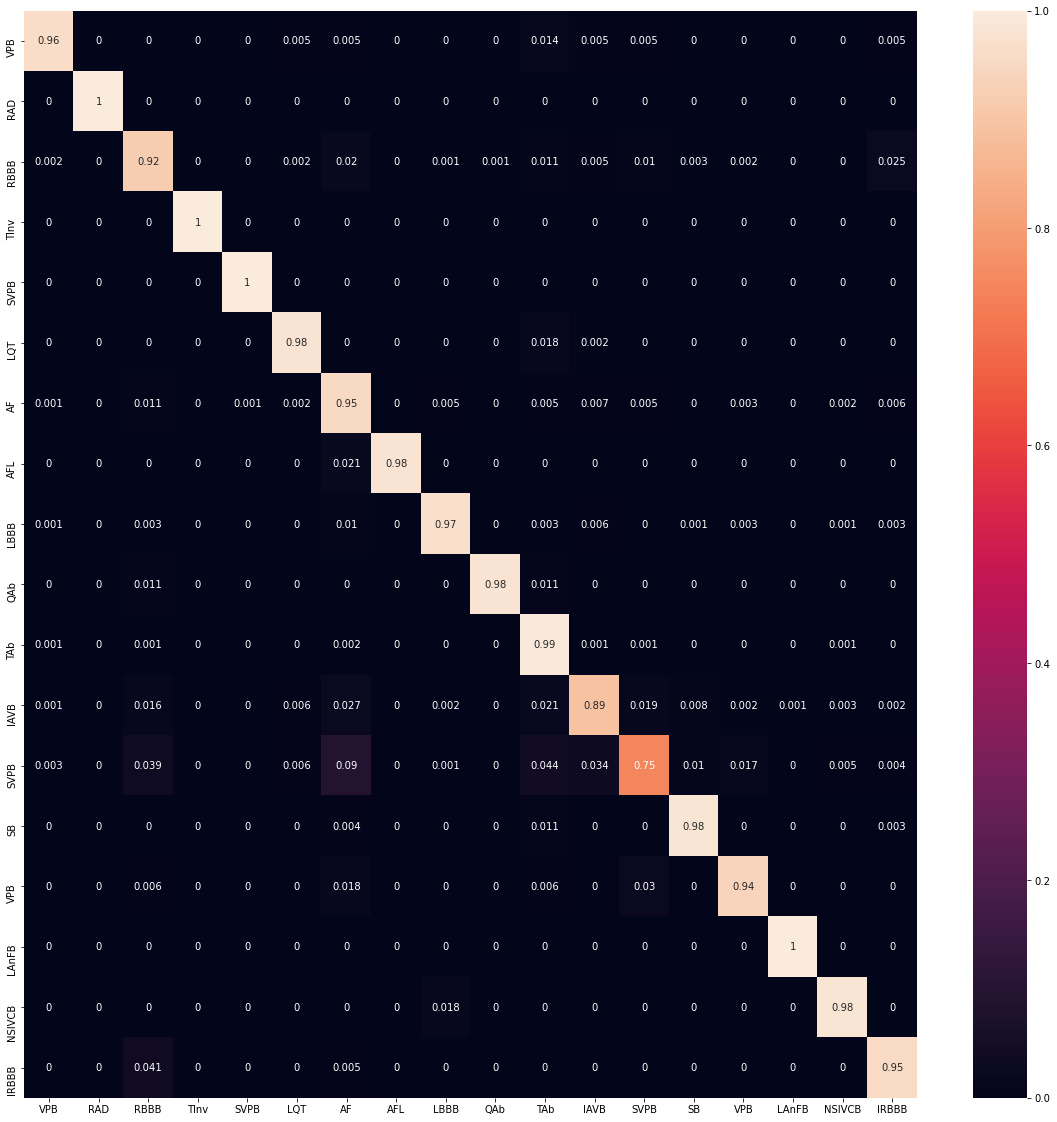

In [30]:
df_cm = pd.DataFrame(matrix_norm, index = [i for i in labels_abrv],columns = [i for i in labels_abrv])
plt.figure(figsize = (20,20))
sn.heatmap(df_cm, annot=True)

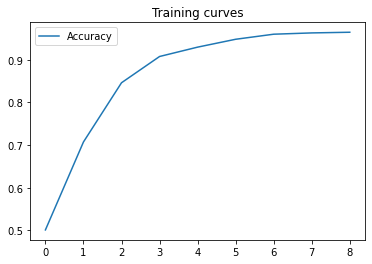

In [31]:
plt.title('Training curves')
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.legend()
plt.show()

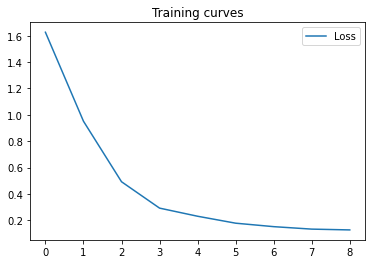

In [32]:
plt.title('Training curves')
plt.plot(history.history['loss'], label = 'Loss')
plt.legend()
plt.show()